# Collecting apartments rental prices

In this notebook, we will try to collect data about apartments rental prices in Morocco

We can choose one of the most used apartments rental platforms in the country. The following platform https://www.mubawab.ma/ contains enough rental publications.

Appartments that are availables for rental across the country are published at the following link : https://www.mubawab.ma/fr/sc/appartements-a-louer

I tried watching the network when the page is loading, but I didn't find any API that serve the data to the front end.

No problem, we can use beautifulsoup4 to scrape the information we are intrested in from the web page of the platform.

To install beautifulsoup4, use the following command :

In [174]:
import requests
from bs4 import BeautifulSoup
import time
import csv

def getApartmentDetails(link):
    headers = {
        "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "accept-language": "fr,en-US;q=0.9,en;q=0.8,ar;q=0.7,fr-FR;q=0.6,ar-MA;q=0.5",
        "cache-control": "max-age=0",
        "sec-ch-ua": "\"Not?A_Brand\";v=\"8\", \"Chromium\";v=\"108\", \"Google Chrome\";v=\"108\"",
        "sec-ch-ua-mobile": "?1",
        "sec-ch-ua-platform": "\"Android\"",
        "sec-fetch-dest": "document",
        "sec-fetch-mode": "navigate",
        "sec-fetch-site": "none",
        "sec-fetch-user": "?1",
        "upgrade-insecure-requests": "1"
    }
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    propMapHolder = soup.find_all("div", {"class": "prop-map-holder"})
    location = soup.find_all("p", {"class": "darkblue inBlock float-right floatL"})
    furnishedLinkDiv = soup.find_all("div", {"id": "furnishedLink"})
    meuble = False
    lat = None
    lon = None
    apartmentDetails = {}
    # if the appartment is furnished we find a div with the following id : furnishedLink
    # So here, we check if len(furnishedLinkDiv) == 1
    if len(furnishedLinkDiv) == 1:
        meuble = True
    if len(propMapHolder) == 1:
        lat = propMapHolder[0].get('lat')
        lon = propMapHolder[0].get('lon')
    apartmentDetails = {
        "meuble": meuble,
        "lat": lat,
        "lon": lon
    }
    return apartmentDetails

def writeDataInFile(dataList):
    with open('data/allApartments.csv', 'a', newline='', encoding="utf-8") as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow(dataList)
        
        
def getDataFromPage(pageNumber) :
    headers = {
        "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "accept-language": "fr,en-US;q=0.9,en;q=0.8,ar;q=0.7,fr-FR;q=0.6,ar-MA;q=0.5",
        "cache-control": "max-age=0",
        "sec-ch-ua": "\"Not?A_Brand\";v=\"8\", \"Chromium\";v=\"108\", \"Google Chrome\";v=\"108\"",
        "sec-ch-ua-mobile": "?1",
        "sec-ch-ua-platform": "\"Android\"",
        "sec-fetch-dest": "document",
        "sec-fetch-mode": "navigate",
        "sec-fetch-site": "none",
        "sec-fetch-user": "?1",
        "upgrade-insecure-requests": "1"
    }
    pageLink = 'https://www.mubawab.ma/fr/sc/appartements-a-louer:p:'+str(pageNumber)
    response = requests.get(pageLink, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    mylis = soup.find_all("li", {"class": "listingBox"})
    # Each page contains multiple appartments, but we should visit every apartment page to access more details
    for thisli in mylis:
        linkref = thisli['linkref']
        print("linkref : ", linkref)
        priceTag = thisli.find_all("span", {"class": "priceTag"})


        adId = thisli.find_all("input", {"class": "adId"})
        floatR = thisli.find_all("h4", {"class": "listingH4 floatR"})
        if len(floatR) == 0:
            floatR = thisli.find_all("p", {"class": "listingH4 floatR"})
        listingH3 = thisli.find_all("h3", {"class": "listingH3"})
        if len(priceTag) == 1 and len(floatR) == 1 and len(listingH3) == 1 and len(adId) == 1:
            adIdText = adId[0]['value'].replace("\xa0", "")
            priceTagText = priceTag[0].getText().replace("\xa0","").replace("\t","").replace("\n", "")
            print("priceTagText : ", priceTagText)
            floatRText = floatR[0].getText().replace("\t","").replace("\n", "")
            print("floatRText : ", floatRText)
            listingH3Text = listingH3[0].getText().replace("\t","").replace("\n", "")
            print("listingH3Text : ", listingH3Text)
            # sleep for a second because the server dosn't like it when we make a multiple successive requests
            time.sleep(1)
            apartmentDetails = getApartmentDetails(linkref)
            # sleep for a second because the server dosn't like it when we make a multiple successive requests
            time.sleep(1)
            meuble = apartmentDetails.get('meuble')
            lat = apartmentDetails.get('lat')
            lon = apartmentDetails.get('lon')
            print("meuble : ",meuble)
            print("lat : ",lat)
            print("lon : ",lon)
            dataList = [adIdText, linkref, priceTagText, floatRText, listingH3Text, meuble, lat, lon]
            print(dataList)
            writeDataInFile(dataList)
        print("---------------------")
# This is the header of the CSV file
dataList = ["adIdText", "linkref", "priceTagText", "floatRText", "listingH3Text", "meuble", "lat", "lon"]
writeDataInFile(dataList)

# At the moment we collect the data from this website, there were 441 pages
for i in range (1,441) :
    getDataFromPage(i)


linkref :  https://www.mubawab.ma/fr/a/7608272/coup-de-c%C5%93ur-soleil-et-confort
priceTagText :  12000 DH
floatRText :  2 chambres, 113 m²
listingH3Text :  Talborjt à Agadir
meuble :  True
lat :  30.422409486654228
lon :  -9.592727129347622
['7608272', 'https://www.mubawab.ma/fr/a/7608272/coup-de-c%C5%93ur-soleil-et-confort', '12000 DH', '2 chambres, 113 m²', 'Talborjt à Agadir', True, '30.422409486654228', '-9.592727129347622']
---------------------
linkref :  https://www.mubawab.ma/fr/a/7609216/agr%C3%A9able-and-cosy-appartement-2-pi%C3%A8ces
priceTagText :  4500 DH
floatRText :  1 chambre, 47 m²
listingH3Text :  Hay Mohammadi à Agadir
meuble :  True
lat :  30.43351928293651
lon :  -9.555529332719743
['7609216', 'https://www.mubawab.ma/fr/a/7609216/agr%C3%A9able-and-cosy-appartement-2-pi%C3%A8ces', '4500 DH', '1 chambre, 47 m²', 'Hay Mohammadi à Agadir', True, '30.43351928293651', '-9.555529332719743']
---------------------
linkref :  https://www.mubawab.ma/fr/a/7568811/gauthier-du

#### We let this code run for some hours

## Cleaning data

Now that we have our data available in a csv file we can explore it and do some statistics on it

In [259]:
import pandas as pd
df = pd.read_csv("data/allApartments_vf.csv", sep=";")

In [260]:
df

,adIdText,linkref,priceTagText,floatRText,listingH3Text,meuble,lat,lon
0,7607854,https://www.mubawab.ma/fr/a/7607854/appartemen...,5500 DH,"2 chambres, 80 m²",Hay Targa à Marrakech,False,NaN,NaN
1,7606633,https://www.mubawab.ma/fr/a/7606633/appartemen...,12000 DH,"2 chambres, 90 m²",Gauthier à Casablanca,True,33.582135,-7.628739
2,7459536,https://www.mubawab.ma/fr/a/7459536/studio-meu...,8000 DH,"1 chambre, 63 m²",Gauthier à Casablanca,True,33.588910,-7.628675
3,7609849,https://www.mubawab.ma/fr/a/7609849/location-s...,7000 DH,"1 chambre, 60 m²",Palmier à Casablanca,True,33.580947,-7.629061
4,7584015,https://www.mubawab.ma/fr/a/7584015/sublime-st...,7500 DH,"1 chambre, 60 m²",Casablanca Finance City à Casablanca,False,NaN,NaN
...,...,...,...,...,...,...,...,...
14139,6891127,https://www.mubawab.ma/fr/a/6891127/location-a...,17000 DH,"3 chambres, 200 m²",Les princesses à Casablanca,False,33.571543,-7.636313
14140,6869999,https://www.mubawab.ma/fr/a/6869999/studio-non...,5000 DH,"1 chambre, 70 m²",Bourgogne Ouest à Casablanca,False,33.599804,-7.648909
14141,6883257,https://www.mubawab.ma/fr/a/6883257/location-a...,8500 DH,"2 chambres, 100 m²",Tanger,True,35.764715,-5.819321
14142,6883256,https://www.mubawab.ma/fr/a/6883256/location-a...,12000 DH,"4 chambres, 220 m²",Tanger,False,35.764715,-5.819321


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14144 entries, 0 to 14143
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adIdText       14144 non-null  int64  
 1   linkref        14144 non-null  object 
 2   priceTagText   14144 non-null  object 
 3   floatRText     14128 non-null  object 
 4   listingH3Text  14144 non-null  object 
 5   meuble         14144 non-null  bool   
 6   lat            13066 non-null  float64
 7   lon            13066 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 787.4+ KB


We keep only rows with a latitude and longitude

In [262]:
df = df[df.lat.notnull()]

In [263]:
df = df[df.lon.notnull()]

We keep only rows with not null floatRText (which contains the number of rooms and the superficy of the appratment)

In [264]:
df = df[df.floatRText.notnull()]

There are some rows in the columns "priceTagText" that doesn't contain the price. There is indicated "Prix à consulter" instead

In [265]:
df = df[df.priceTagText.str.contains("Prix à consulter") == False]

In [266]:
df = df[df.priceTagText.str.contains("DH") == True]

Deleting rows with outliers

I found out, that there are some rows with wrong latitudes and longitudes that belongs to other countries, so we will select only rows with latitude and longitudes that are in the following range

![title](images/carte_maroc.png)

In [267]:
df = df[df.lat < 36.010438]

In [268]:
df = df[df.lat > 20.198390]

In [269]:
df = df[df.lon < -0.385065]

In [270]:
df = df[df.lon > -18.679048]

In [271]:
df

,adIdText,linkref,priceTagText,floatRText,listingH3Text,meuble,lat,lon
1,7606633,https://www.mubawab.ma/fr/a/7606633/appartemen...,12000 DH,"2 chambres, 90 m²",Gauthier à Casablanca,True,33.582135,-7.628739
2,7459536,https://www.mubawab.ma/fr/a/7459536/studio-meu...,8000 DH,"1 chambre, 63 m²",Gauthier à Casablanca,True,33.588910,-7.628675
3,7609849,https://www.mubawab.ma/fr/a/7609849/location-s...,7000 DH,"1 chambre, 60 m²",Palmier à Casablanca,True,33.580947,-7.629061
5,7497758,https://www.mubawab.ma/fr/a/7497758/appartemen...,4500 DH,"1 chambre, 125 m²",Route de Fez à Marrakech,False,31.646221,-7.849731
7,7585007,https://www.mubawab.ma/fr/a/7585007/appartemen...,9000 DH,"2 chambres, 70 m²",Les Hôpitaux à Casablanca,False,33.571543,-7.636313
...,...,...,...,...,...,...,...,...
14139,6891127,https://www.mubawab.ma/fr/a/6891127/location-a...,17000 DH,"3 chambres, 200 m²",Les princesses à Casablanca,False,33.571543,-7.636313
14140,6869999,https://www.mubawab.ma/fr/a/6869999/studio-non...,5000 DH,"1 chambre, 70 m²",Bourgogne Ouest à Casablanca,False,33.599804,-7.648909
14141,6883257,https://www.mubawab.ma/fr/a/6883257/location-a...,8500 DH,"2 chambres, 100 m²",Tanger,True,35.764715,-5.819321
14142,6883256,https://www.mubawab.ma/fr/a/6883256/location-a...,12000 DH,"4 chambres, 220 m²",Tanger,False,35.764715,-5.819321


In [272]:
df = df[df.floatRText.str.contains("m²") == True]

In [273]:
df = df[df.floatRText.str.contains("chambre") == True]

We add another column called price in which we write the rental price based on the column priceTagText

In [274]:
df['price'] = df.apply(lambda x: x['priceTagText'].replace(" DH","").split(",")[0] , axis=1)

We add another column called superficy in which we write the apartment superficy based on the column floatRText

In [275]:
df['superficy'] = df.apply(lambda x: x['floatRText'].split(", ")[1].replace(" m²", "") , axis=1)

In [276]:
df

,adIdText,linkref,priceTagText,floatRText,listingH3Text,meuble,lat,lon,price,superficy
1,7606633,https://www.mubawab.ma/fr/a/7606633/appartemen...,12000 DH,"2 chambres, 90 m²",Gauthier à Casablanca,True,33.582135,-7.628739,12000,90
2,7459536,https://www.mubawab.ma/fr/a/7459536/studio-meu...,8000 DH,"1 chambre, 63 m²",Gauthier à Casablanca,True,33.588910,-7.628675,8000,63
3,7609849,https://www.mubawab.ma/fr/a/7609849/location-s...,7000 DH,"1 chambre, 60 m²",Palmier à Casablanca,True,33.580947,-7.629061,7000,60
5,7497758,https://www.mubawab.ma/fr/a/7497758/appartemen...,4500 DH,"1 chambre, 125 m²",Route de Fez à Marrakech,False,31.646221,-7.849731,4500,125
7,7585007,https://www.mubawab.ma/fr/a/7585007/appartemen...,9000 DH,"2 chambres, 70 m²",Les Hôpitaux à Casablanca,False,33.571543,-7.636313,9000,70
...,...,...,...,...,...,...,...,...,...,...
14139,6891127,https://www.mubawab.ma/fr/a/6891127/location-a...,17000 DH,"3 chambres, 200 m²",Les princesses à Casablanca,False,33.571543,-7.636313,17000,200
14140,6869999,https://www.mubawab.ma/fr/a/6869999/studio-non...,5000 DH,"1 chambre, 70 m²",Bourgogne Ouest à Casablanca,False,33.599804,-7.648909,5000,70
14141,6883257,https://www.mubawab.ma/fr/a/6883257/location-a...,8500 DH,"2 chambres, 100 m²",Tanger,True,35.764715,-5.819321,8500,100
14142,6883256,https://www.mubawab.ma/fr/a/6883256/location-a...,12000 DH,"4 chambres, 220 m²",Tanger,False,35.764715,-5.819321,12000,220


We convert the 'price' and 'superficy' columns to int type

In [277]:
df['price'] = df['price'].astype('int')

In [278]:
df['superficy'] = df['superficy'].astype('int')

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11938 entries, 1 to 14143
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adIdText       11938 non-null  int64  
 1   linkref        11938 non-null  object 
 2   priceTagText   11938 non-null  object 
 3   floatRText     11938 non-null  object 
 4   listingH3Text  11938 non-null  object 
 5   meuble         11938 non-null  bool   
 6   lat            11938 non-null  float64
 7   lon            11938 non-null  float64
 8   price          11938 non-null  int32  
 9   superficy      11938 non-null  int32  
dtypes: bool(1), float64(2), int32(2), int64(1), object(4)
memory usage: 851.0+ KB


In [280]:
df = df[df.price < 30000]

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 1 to 14143
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adIdText        11812 non-null  int64  
 1   linkref         11812 non-null  object 
 2   priceTagText    11812 non-null  object 
 3   floatRText      11812 non-null  object 
 4   listingH3Text   11812 non-null  object 
 5   meuble          11812 non-null  bool   
 6   lat             11812 non-null  float64
 7   lon             11812 non-null  float64
 8   price           11812 non-null  int32  
 9   superficy       11812 non-null  int32  
 10  superficyPrice  11812 non-null  float64
dtypes: bool(1), float64(3), int32(2), int64(1), object(4)
memory usage: 934.3+ KB


We add a new column called 'superficyPrice' in which we write the 1m² superficy price

In [293]:
df['superficyPrice'] = df.apply(lambda x: x['price'] / x['superficy'] , axis=1)

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
df

,adIdText,linkref,priceTagText,floatRText,listingH3Text,meuble,lat,lon,price,superficy,superficyPrice
1,7606633,https://www.mubawab.ma/fr/a/7606633/appartemen...,12000 DH,"2 chambres, 90 m²",Gauthier à Casablanca,True,33.582135,-7.628739,12000,90,133.333333
2,7459536,https://www.mubawab.ma/fr/a/7459536/studio-meu...,8000 DH,"1 chambre, 63 m²",Gauthier à Casablanca,True,33.588910,-7.628675,8000,63,126.984127
3,7609849,https://www.mubawab.ma/fr/a/7609849/location-s...,7000 DH,"1 chambre, 60 m²",Palmier à Casablanca,True,33.580947,-7.629061,7000,60,116.666667
5,7497758,https://www.mubawab.ma/fr/a/7497758/appartemen...,4500 DH,"1 chambre, 125 m²",Route de Fez à Marrakech,False,31.646221,-7.849731,4500,125,36.000000
7,7585007,https://www.mubawab.ma/fr/a/7585007/appartemen...,9000 DH,"2 chambres, 70 m²",Les Hôpitaux à Casablanca,False,33.571543,-7.636313,9000,70,128.571429
...,...,...,...,...,...,...,...,...,...,...,...
14139,6891127,https://www.mubawab.ma/fr/a/6891127/location-a...,17000 DH,"3 chambres, 200 m²",Les princesses à Casablanca,False,33.571543,-7.636313,17000,200,85.000000
14140,6869999,https://www.mubawab.ma/fr/a/6869999/studio-non...,5000 DH,"1 chambre, 70 m²",Bourgogne Ouest à Casablanca,False,33.599804,-7.648909,5000,70,71.428571
14141,6883257,https://www.mubawab.ma/fr/a/6883257/location-a...,8500 DH,"2 chambres, 100 m²",Tanger,True,35.764715,-5.819321,8500,100,85.000000
14142,6883256,https://www.mubawab.ma/fr/a/6883256/location-a...,12000 DH,"4 chambres, 220 m²",Tanger,False,35.764715,-5.819321,12000,220,54.545455


No that we have a clean dataframe we can make two dataframes for furnished and unfurnished appartments

In [284]:
dfFurnished = df[df.meuble == True]

In [285]:
dfFurnished

,adIdText,linkref,priceTagText,floatRText,listingH3Text,meuble,lat,lon,price,superficy,superficyPrice
1,7606633,https://www.mubawab.ma/fr/a/7606633/appartemen...,12000 DH,"2 chambres, 90 m²",Gauthier à Casablanca,True,33.582135,-7.628739,12000,90,133.333333
2,7459536,https://www.mubawab.ma/fr/a/7459536/studio-meu...,8000 DH,"1 chambre, 63 m²",Gauthier à Casablanca,True,33.588910,-7.628675,8000,63,126.984127
3,7609849,https://www.mubawab.ma/fr/a/7609849/location-s...,7000 DH,"1 chambre, 60 m²",Palmier à Casablanca,True,33.580947,-7.629061,7000,60,116.666667
10,7608191,https://www.mubawab.ma/fr/a/7608191/appartemen...,4750 DH,"2 chambres, 60 m²",Guéliz à Marrakech,True,31.642568,-8.007832,4750,60,79.166667
12,7567805,https://www.mubawab.ma/fr/a/7567805/studio-meu...,4800 DH,"1 chambre, 70 m²",Route Casablanca à Marrakech,True,31.756138,-7.978477,4800,70,68.571429
...,...,...,...,...,...,...,...,...,...,...,...
14126,6883204,https://www.mubawab.ma/fr/a/6883204/location-a...,8000 DH,"3 chambres, 115 m²",Tanger,True,35.764715,-5.819321,8000,115,69.565217
14129,6722591,https://www.mubawab.ma/fr/a/6722591/appartemen...,25000 DH,"3 chambres, 200 m²",Marchan à Tanger,True,35.786987,-5.818806,25000,200,125.000000
14132,6000738,https://www.mubawab.ma/fr/a/6000738/luxueux-ap...,16500 DH,"3 chambres, 164 m²",De La Plage à Tanger,True,35.775706,-5.796490,16500,164,100.609756
14133,6150632,https://www.mubawab.ma/fr/a/6150632/appartemen...,15500 DH,"2 chambres, 129 m²",Malabata à Tanger,True,35.792290,-5.754261,15500,129,120.155039


In [286]:
dfUnfunished = df[df.meuble == False]

In [287]:
dfUnfunished

,adIdText,linkref,priceTagText,floatRText,listingH3Text,meuble,lat,lon,price,superficy,superficyPrice
5,7497758,https://www.mubawab.ma/fr/a/7497758/appartemen...,4500 DH,"1 chambre, 125 m²",Route de Fez à Marrakech,False,31.646221,-7.849731,4500,125,36.000000
7,7585007,https://www.mubawab.ma/fr/a/7585007/appartemen...,9000 DH,"2 chambres, 70 m²",Les Hôpitaux à Casablanca,False,33.571543,-7.636313,9000,70,128.571429
9,7602007,https://www.mubawab.ma/fr/a/7602007/appartemen...,4750 DH,"2 chambres, 80 m²",Hay Mabrouka à Marrakech,False,31.642568,-8.007832,4750,80,59.375000
14,7601719,https://www.mubawab.ma/fr/a/7601719/bel-appart...,15000 DH,"3 chambres, 209 m²",Casablanca Finance City à Casablanca,False,33.559335,-7.652459,15000,209,71.770335
16,7584976,https://www.mubawab.ma/fr/a/7584976/un-studio-...,5200 DH,"1 chambre, 35 m²",Hassan - Centre Ville à Rabat,False,34.021497,-6.830149,5200,35,148.571429
...,...,...,...,...,...,...,...,...,...,...,...
14138,6892079,https://www.mubawab.ma/fr/a/6892079/appartemen...,11000 DH,"2 chambres, 108 m²",Ferme Bretonne (Hay Arraha) à Casablanca,False,33.560851,-7.647085,11000,108,101.851852
14139,6891127,https://www.mubawab.ma/fr/a/6891127/location-a...,17000 DH,"3 chambres, 200 m²",Les princesses à Casablanca,False,33.571543,-7.636313,17000,200,85.000000
14140,6869999,https://www.mubawab.ma/fr/a/6869999/studio-non...,5000 DH,"1 chambre, 70 m²",Bourgogne Ouest à Casablanca,False,33.599804,-7.648909,5000,70,71.428571
14142,6883256,https://www.mubawab.ma/fr/a/6883256/location-a...,12000 DH,"4 chambres, 220 m²",Tanger,False,35.764715,-5.819321,12000,220,54.545455


In [305]:
dfFurnished.describe()

,adIdText,lat,lon,price,superficy,superficyPrice
count,4.848000e+03,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,7.440069e+06,33.495453,-7.372073,8805.208746,123.304455,91.084979
std,2.271192e+05,1.334441,0.960763,4860.631234,1440.247885,37.568763
min,5.613479e+06,27.139965,-13.187885,150.000000,14.000000,0.005000
25%,7.392083e+06,33.517412,-7.679186,6000.000000,65.000000,66.186975
50%,7.514934e+06,33.582734,-7.636313,7800.000000,90.000000,88.461538
75%,7.571845e+06,33.954469,-6.869654,11000.000000,120.000000,115.384615
max,7.612494e+06,35.845300,-1.842908,29000.000000,100000.000000,300.000000


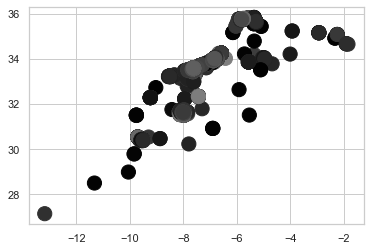

In [288]:
import matplotlib.pyplot as plt
plt.scatter(dfFurnished.lon, dfFurnished.lat, s=200, c=dfFurnished.superficyPrice, cmap='gray')
plt.show()

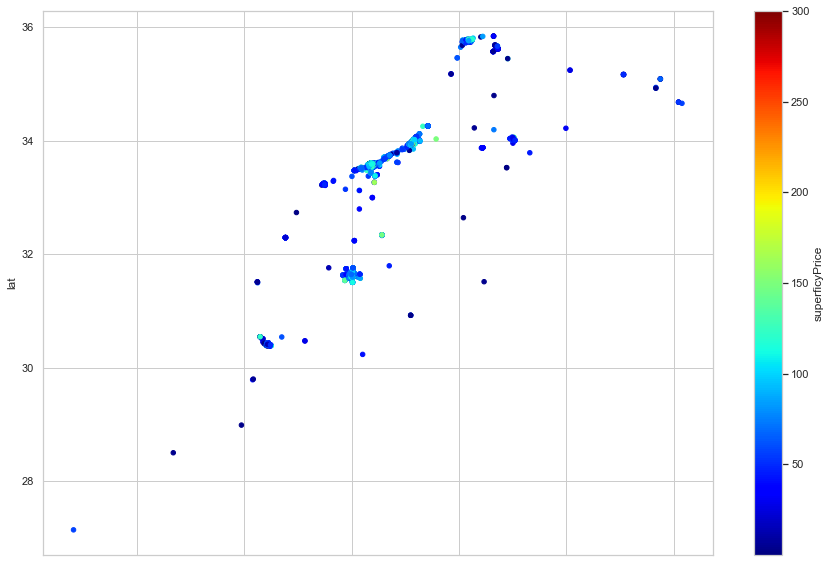

In [294]:

dfFurnished.plot.scatter('lon', 'lat', c='superficyPrice', colormap='jet', figsize=(15, 10))

In [304]:
dfUnfunished.describe()

,adIdText,lat,lon,price,superficy,superficyPrice
count,6.959000e+03,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000
mean,7.448081e+06,33.554223,-7.384235,8523.154045,118.554534,74.664132
std,1.833641e+05,0.998740,0.808632,5082.555260,130.844083,31.490806
min,5.648762e+06,21.613280,-16.469171,110.000000,19.000000,0.916667
25%,7.381322e+06,33.547118,-7.671375,5000.000000,78.000000,52.941176
50%,7.515441e+06,33.582734,-7.628675,7500.000000,100.000000,72.033898
75%,7.578677e+06,33.943146,-6.888976,11000.000000,141.000000,93.333333
max,7.612352e+06,35.880129,-1.904486,29500.000000,7300.000000,228.260870


In [301]:
dfUnfunished = dfUnfunished[dfUnfunished.superficyPrice < 250]

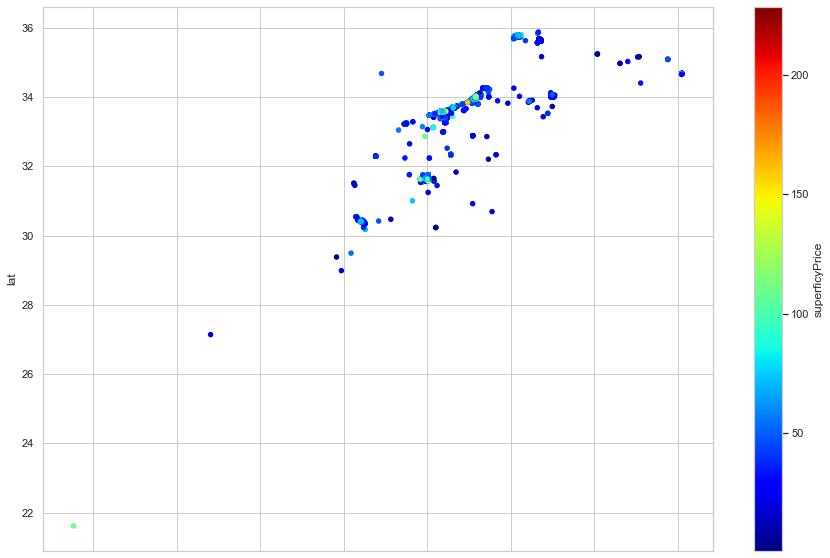

In [303]:
dfUnfunished.plot.scatter('lon', 'lat', c='superficyPrice', colormap='jet', figsize=(15, 10))